# BigData API serving : notebook for pre-treatments

In [3]:
%load_ext autoreload
%autoreload 2
from utils import *

In [1]:
csv_filepath = '../data/init_data.csv'

## Step 1 : load the dataset

In [4]:
X, y, col_num, col_cat, labels = load_heterogeneous_dataset(csv_filepath, debugging=True)

Number of rows and columns with numerical values : (91713, 74)
Number of rows and columns with categorical values : (91713, 7)
y.shape = (91713,)
X_num =        hospital_id   age        bmi  elective_surgery  height  icu_id  \
0              118  68.0  22.730000                 0   180.3      92   
1               81  77.0  27.420000                 0   160.0      90   
2              118  25.0  31.950000                 0   172.7      93   
3              118  81.0  22.640000                 1   165.1      92   
4               33  19.0        NaN                 0   188.0      91   
...            ...   ...        ...               ...     ...     ...   
91708           30  75.0  23.060250                 0   177.8     927   
91709          121  56.0  47.179671                 0   183.0     925   
91710          195  48.0  27.236914                 0   170.2     908   
91711           66   NaN  23.297481                 0   154.9     922   
91712          104  82.0  22.031250        

## Step 2 : imput numerical and categorical missing values

In [5]:
# the imputer function return the new dataset which is the concatenation of the imputed numerical and categorical data
X_concat = imputer_variables(X, col_num, col_cat, debugging=True)

X_cat_filled: [[2. 1. 1. ... 2. 9. 0.]
 [2. 0. 1. ... 5. 8. 6.]
 [2. 0. 0. ... 5. 5. 3.]
 ...
 [2. 1. 0. ... 5. 5. 3.]
 [2. 0. 0. ... 5. 8. 6.]
 [2. 0. 2. ... 5. 1. 1.]]
X_num_imput: [[118.          68.          22.73       ...   0.           0.
    0.        ]
 [ 81.          77.          27.42       ...   0.           0.
    0.        ]
 [118.          25.          31.95       ...   0.           0.
    0.        ]
 ...
 [195.          48.          27.23691351 ...   0.           0.
    0.        ]
 [ 66.          62.30951592  23.29748133 ...   0.           0.
    0.        ]
 [104.          82.          22.03125    ...   0.           0.
    0.        ]]
newDataset: [[118.          68.          22.73       ...   0.           9.
    0.        ]
 [ 81.          77.          27.42       ...   0.           8.
    6.        ]
 [118.          25.          31.95       ...   0.           5.
    3.        ]
 ...
 [195.          48.          27.23691351 ...   0.           5.
    3.        ]
 [ 6

## Step 3 : choose the criterion use as scoring method

L'idée étant de ne pas prévoir qu'un patient ne va pas mourir alors que c'est le cas (faux positif), le critère de scoring le plus adapté serait donc le rappel. 

## Step 4 : compare classifiers models with the cross validation method

In [6]:
#create the classifier dictionary
clfs = init_clfs()

In [7]:
bestClf, X_train, X_test, y_train, y_test, strategy = comparison_cross_validation(X_concat, y, clfs, debugging=True)

Running Naive Bayes...
Results for Naive Bayes :
Execution time: 1.428 s
Mean of criterion choose for Naive Bayes is: 0.738 +/- 0.009


Best model: GaussianNB() with score: 0.7383006393889254
Running Naive Bayes...
Results for Naive Bayes :
Execution time: 1.210 s
Mean of criterion choose for Naive Bayes is: 0.738 +/- 0.010


Best model: GaussianNB() with score: 0.7379276118423225
Running Naive Bayes...
Results for Naive Bayes :
Execution time: 0.866 s
Mean of criterion choose for Naive Bayes is: 0.595 +/- 0.008


Best model: GaussianNB() with score: 0.5945803865267622
Finally with 10 splits during cross-validation:
Best model without PCA and without normalization: GaussianNB() with score: 0.7383006393889254
Best model without PCA and with normalization: GaussianNB() with score: 0.7379276118423225
Best model with PCA and with normalization: GaussianNB() with score: 0.5945803865267622
Finally the best model is: GaussianNB() with score: 0.7383006393889254 and strategy: natural


## Step 5 : according to the embedded X_train, X_test and y_train, y_test, save the new dataset as a csv file

In [8]:
#first update labels according to the strategy (for e.g. if the strategy is PCA with 3 components
# so 3 more columns will be added to the dataset with the labels 'PCA_1', 'PCA_2', 'PCA_3') and rename the prediction column as "target"
updated_labels = update_labels_for_stragegy(labels, strategy)

Updated labels : ['hospital_id' 'age' 'bmi' 'elective_surgery' 'ethnicity' 'gender'
 'height' 'icu_admit_source' 'icu_id' 'icu_stay_type' 'icu_type'
 'pre_icu_los_days' 'weight' 'apache_2_diagnosis' 'apache_3j_diagnosis'
 'apache_post_operative' 'arf_apache' 'gcs_eyes_apache' 'gcs_motor_apache'
 'gcs_unable_apache' 'gcs_verbal_apache' 'heart_rate_apache'
 'intubated_apache' 'map_apache' 'resprate_apache' 'temp_apache'
 'ventilated_apache' 'd1_diasbp_max' 'd1_diasbp_min'
 'd1_diasbp_noninvasive_max' 'd1_diasbp_noninvasive_min'
 'd1_heartrate_max' 'd1_heartrate_min' 'd1_mbp_max' 'd1_mbp_min'
 'd1_mbp_noninvasive_max' 'd1_mbp_noninvasive_min' 'd1_resprate_max'
 'd1_resprate_min' 'd1_spo2_max' 'd1_spo2_min' 'd1_sysbp_max'
 'd1_sysbp_min' 'd1_sysbp_noninvasive_max' 'd1_sysbp_noninvasive_min'
 'd1_temp_max' 'd1_temp_min' 'h1_diasbp_max' 'h1_diasbp_min'
 'h1_diasbp_noninvasive_max' 'h1_diasbp_noninvasive_min'
 'h1_heartrate_max' 'h1_heartrate_min' 'h1_mbp_max' 'h1_mbp_min'
 'h1_mbp_noninvasiv

In [9]:
# replace the original ref_data.csv with the new data imputed
csv_filename = 'ref_data.csv'
create_data_csv([X_train, X_test], [y_train, y_test], updated_labels, csv_filename)

Data saved in ../data/ref_data.csv


## Step 6 : variables selection

Features sorted by importance saved in features_sorted_by_importance.csv
Importances values of variables: 
 [0.01232402 0.01503743 0.01552142 0.00138528 0.00336683 0.00182032
 0.01241964 0.00472519 0.01347122 0.00120791 0.00596409 0.01817851
 0.01473667 0.01181073 0.0185608  0.00110763 0.00106809 0.01405874
 0.01473855 0.00108687 0.0103539  0.01543089 0.00270521 0.01459266
 0.01188901 0.01781363 0.00872211 0.01156122 0.01470648 0.01142871
 0.01398938 0.01639657 0.02487216 0.01167607 0.01589838 0.01169487
 0.01552163 0.01356632 0.01446109 0.00650705 0.02639061 0.01305586
 0.0209104  0.01292705 0.02058152 0.01993061 0.01978422 0.01070907
 0.01098702 0.01061053 0.01127543 0.01265207 0.01236413 0.01032622
 0.01087863 0.01037164 0.01142389 0.01221122 0.01415147 0.00799481
 0.01072744 0.01155886 0.01190234 0.01155238 0.01209026 0.01472987
 0.01755044 0.01303826 0.01355909 0.07025012 0.06789287 0.00025998
 0.00104409 0.00178809 0.00108396 0.00164969 0.00059855 0.0006086
 0.00192069 0.00582424

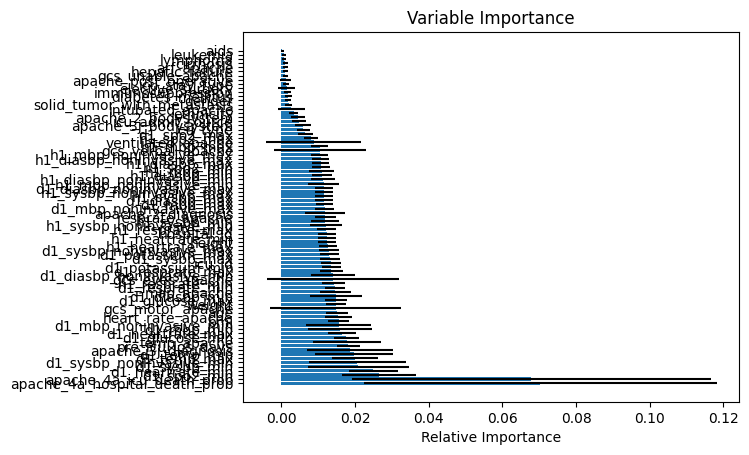

In [10]:
sorted_idx = feature_importance(X_train, y_train, labels, debugging=True)

Number of features selected : 71


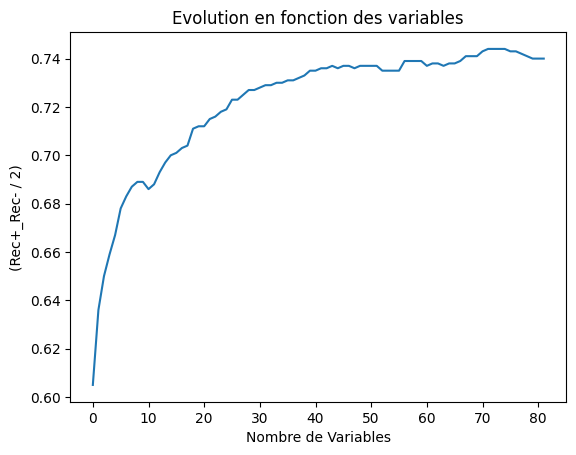

In [11]:
nb_selected_features = feature_selection(X_train, X_test, y_train, y_test, bestClf, sorted_idx, debugging=True)

## Step 7 : search best hyperparameters for the best classifier found

In [12]:
#create the classifier parameters dictionary
clfs_parameters = init_clfs_parameters()

In [13]:
#select for this model the corresponding parameters grid
param_grid = clfs_parameters[type(bestClf)]

#update X_train with the selected features
X_train_selected = X_train[:,sorted_idx[:nb_selected_features]]

newBestClf = fine_tune_model(X_train_selected, y_train, bestClf, param_grid, debugging=True)

Best score after parameters: 0.7417356562628599
The best fine-tuned model is : 
 GaussianNB()


## Step 8 : creation of the pickles file and the pipeline

In [14]:
creation_pipelines(X, y, col_num, col_cat, bestClf, strategy, nb_selected_features, artifacts_path="../artifacts/", debugging=True)

Pipeline saved as ../artifacts/imputer.pkl
Pipeline created: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  [0, 1, 2, 3, 6, 8, 11, 12, 13,
                                                   14, 15, 16, 17, 18, 19, 20,
                                                   21, 22, 23, 24, 25, 26, 27,
                                                   28, 29, 30, 31, 32, 33, 34, ...]),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OrdinalEncoder())]),
                                                  [4, 5, 7, 9, 10, 79, 80])]))])
Pipeline saved a

# Test to load and predict

In [15]:
model = load_pipeline("../artifacts/model.pkl")
print(model)
predictions = model.predict(X_train)
print(predictions)

Pipeline(steps=[('fs',
                 SelectFromModel(estimator=RandomForestClassifier(n_estimators=1000,
                                                                  random_state=1),
                                 max_features=np.int64(71))),
                ('classifier', GaussianNB())])
[1 1 1 ... 1 1 1]
